<h1> Etude de prédiction sur des données concernant Les fleurs Iris</h1>

<h4>1. Préparation de donneés </h4>

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import  validation_curve, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from mpl_toolkits import mplot3d

data_flower = px.data.iris()
data_flower.columns.values.tolist()

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species',
 'species_id']

<h4>2.Prétraitement et visulaisation</h4>

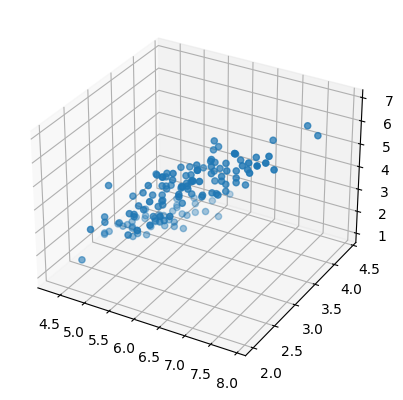

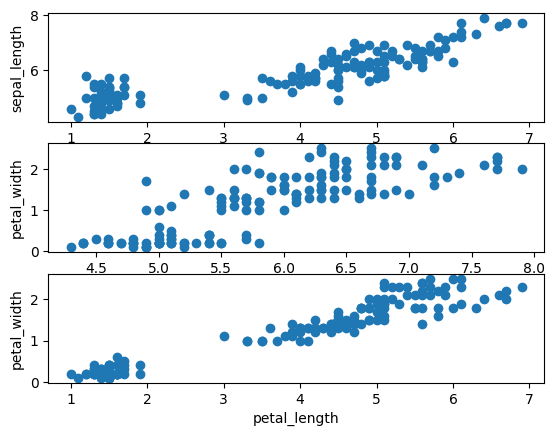

In [138]:
#plotting the correlation beetwen features of data

data_flower = data_flower[np.isfinite(data_flower['sepal_length'])]
def plotting(data, _attribute_list):
    length = len(_attribute_list)
    fig, ax = plt.subplots(length, 1)
    if length == 1:
        ax.scatter(data[_attribute_list[0][0]], data[_attribute_list[0][1]])
        ax.set_xlabel(_attribute_list[0][0])
        ax.set_ylabel(_attribute_list[0][1])
    else:
        for i in range(len(_attribute_list)):
            ax[i].scatter(data[_attribute_list[i][0]], data[_attribute_list[i][1]])
            ax[i].set_xlabel(_attribute_list[i][0])
            ax[i].set_ylabel(_attribute_list[i][1])

axes = plt.axes(projection='3d')            
axes.scatter3D(data_flower['sepal_length'], data_flower['sepal_width'],data_flower['petal_length'])
plotting(data_flower, 
         [['petal_length', 'sepal_length'],['sepal_length', 'petal_width'],['petal_length', 'petal_width']])

<h4>On peut deja constater une corelation assez remarquable entre les mesures de petal et celles de sepal</h4>
<h4>On espere predire les mesures de petal grace aux mesure de sepal.Un modele de regression sera utilisé en effet. La formule général de regression linéaire étant :</h4>
$\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $...
Soit  $y$ la valeur à prédire, on a $y = \beta_{0}x + b$ avec b l'ordonée de la droite d'ajustement lineaire


<h4>3.Entrainement du modèle(regression linéaire optimisé avec la méthode descent gradient)</h4>

[0.52498028]
[3.77949462]


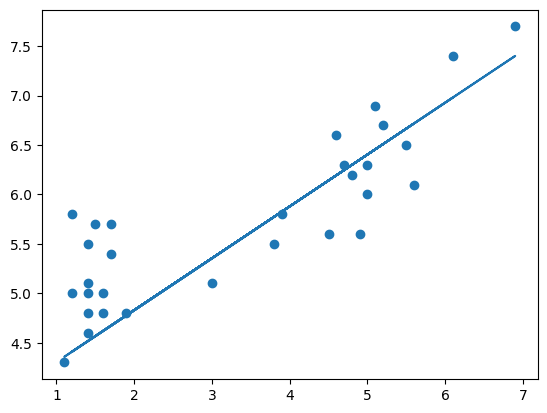

In [136]:
X_train, X_test, y_train, y_test = train_test_split(data_flower['petal_length'], data_flower['sepal_length'], test_size=0.2)
SGDreg = SGDRegressor()
SGDreg.fit(X_train.values.reshape(-1,1), y_train)
predict_values = SGDreg.predict(X_test.values.reshape(-1,1))
plt.scatter(X_test, y_test)
plt.plot(X_test, predict_values)
print(SGDreg.coef_)
print(SGDreg.intercept_)

<h4>4.Validation des hyperparametres (Validation croisée avec 5 blocks)</h4>

Meilleur parametres : {'eta0': 0.11, 'alpha': 0.1}
Meilleur score par validation croisée:  0.6908092914493607
Meilleur parametres : {'alpha': 0.1, 'eta0': 0.01}
Meilleur score par validation croisée:  0.6962652056538918


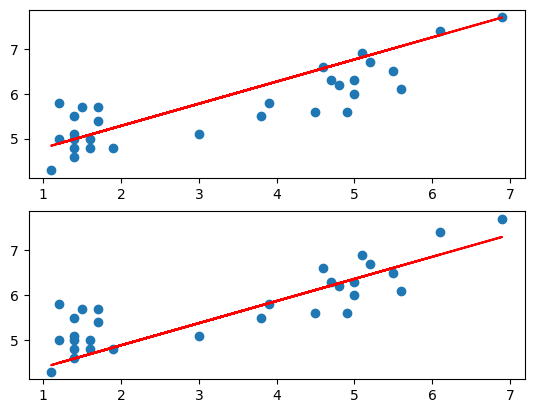

In [137]:
fig , ax = plt.subplots(2,1)
def K_Validation_Perform(ModelType, i):
    
    SGDreg1 = SGDRegressor()

    params = {
    'eta0': np.arange(0.01, 1, 0.1),
     'alpha': np.arange(0.1, 1),
    }

    RegType = ModelType(SGDreg1, params, cv=5)
    RegType.fit(X_train.values.reshape(-1,1), y_train)
    best_reg = RegType.best_estimator_
    print("Meilleur parametres :",RegType.best_params_)
    print("Meilleur score par validation croisée: ",RegType.best_score_)
    y_pred = best_reg.predict(X_test.values.reshape(-1,1))
    ax[i].scatter(X_test, y_test)
    ax[i].plot(X_test, y_pred, color='red')

K_Validation_Perform(RandomizedSearchCV, 0)
K_Validation_Perform(GridSearchCV, 1)

<h4>On peut constater qu'il y a une forte correlation entre la longueure des petal et celle des sepal. Disons qu'on peut prédire la longueure des sepal en ayant juste celle des petal </h4> 